In [1]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def norm_dist(x, mu, sigma) :
    return (1.0/np.sqrt(2*np.pi*sigma**2) * np.exp(-(x-mu)**2 / (2*sigma**2)))
def plot_norm_dist(mu,sigma ) :
    x_range = np.arange(-6.0,6.0,0.01)
    y = norm_dist(x_range, mu, sigma)
    plt.plot(x_range, y);
    plt.show();

## The normal distribution
$$ p(x |\mu, \sigma^2)=\frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x-\mu)^2}{2\sigma^2}} $$

$$N\approx(\mu,\sigma)$$

Where $\mu$ is the mean, and $\sigma$ is the standard deviation.

In [3]:
mu = 0.0
sigma = 1.0
interactive_plot = interactive(plot_norm_dist, 
                               mu=(-6.0, 6.0), sigma=(0, 3, 0.1))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(FloatSlider(value=0.0, description=u'mu', max=6.0, min=-6.0), FloatSlider(value=1.0, description=u'sigma', max=3.0), Output(layout=Layout(height=u'350px'))), _dom_classes=('widget-interact',))

# Distribution of Dice throws
Dice are *uniform* random number generators. The probability of generating each number in the range is equal.
$$ p(D=x) =   \begin{cases} 
                \frac{1}{N} & \quad \text{if } a <= x <= b \\
                0  & \quad \text{otherwise} \\
            \end{cases}
$$
where $p(D=x)$ is the probability of observing $x$, $a$ is the minimum value on the die and $b$ is the maximum value. $N=b-a+1$ is the number of sides.



If we have more than one dice, our dice throws are *Independently, Identically distributed* (IID). They are *Independently* distributed if the result of each throw is not dependent on any other throw (which they are). And *Identically* distributed if they are the same type of non-loaded dice (i.e. 2 six-sided). 



The joint distribution of two dice is:
$$ p(D=x,D=y) = p(D=x)p(D=y)$$
i.e. the joint probability is equal to the product of the two individual probabilities. This is true for all IID samples.

The probability of each result for each combination of die throw

| |1|2|3|4|5|6|
|-|-|-|-|-|-|-|
|1|$\frac{1}{32}$|$\frac{1}{32}$|$\frac{1}{32}$|$\frac{1}{32}$|$\frac{1}{32}$|$\frac{1}{32}$|
|2|$\frac{1}{32}$|$\frac{1}{32}$|$\frac{1}{32}$|$\frac{1}{32}$|$\frac{1}{32}$|$\frac{1}{32}$|
|3|$\frac{1}{32}$|$\frac{1}{32}$|$\frac{1}{32}$|$\frac{1}{32}$|$\frac{1}{32}$|$\frac{1}{32}$|
|4|$\frac{1}{32}$|$\frac{1}{32}$|$\frac{1}{32}$|$\frac{1}{32}$|$\frac{1}{32}$|$\frac{1}{32}$|
|5|$\frac{1}{32}$|$\frac{1}{32}$|$\frac{1}{32}$|$\frac{1}{32}$|$\frac{1}{32}$|$\frac{1}{32}$|
|6|$\frac{1}{32}$|$\frac{1}{32}$|$\frac{1}{32}$|$\frac{1}{32}$|$\frac{1}{32}$|$\frac{1}{32}$|

note that the probabilities are the same every where. 


The sum of two dice

| |1|2|3|4|5|6|
|-|-|-|-|-|-|-|
|1|2|3|4|5|6|7|
|2|3|4|5|6|7|8|
|3|4|5|6|7|8|9|
|4|5|6|7|8|9|10|
|5|6|7|8|9|10|11|
|6|7|8|9|10|11|12|

Note how each specific combination is equally probable but 7 is the most common sum as there are more combinations of dice that sum to 7.

In [4]:
def many_dice(num_dice, num_throws_power_10,sides):
    num_trails = 10**num_throws_power_10;
    throws = np.random.randint(low=1.0, high=sides, size=[num_dice, num_trails])
    sums = np.sum(throws,axis=0)
    plt.clf()
    plt.hist(sums,bins=range(num_dice*sides+1))
    plt.xlabel('Throw value (sum of dice)')
    plt.ylabel('Number of throws')
    plt.show()
    
interactive(many_dice, num_dice=(1,50,1), num_throws_power_10=(0,5,1), sides=(2,20,1))

interactive(children=(IntSlider(value=25, description=u'num_dice', max=50, min=1), IntSlider(value=2, description=u'num_throws_power_10', max=5), IntSlider(value=11, description=u'sides', max=20, min=2), Output()), _dom_classes=('widget-interact',))

# Effect of noise on correlation
Recall that correlation is the normalised covariance between two variables $X$ and $Y$.

$$\rho = \frac{cov(X,Y}{std(X)std(Y)}$$

$\rho^2$ is the variance of $Y$ explained by $X$. If $X=Y$ than $\rho^2=1$ and all variance in $Y$ is explained by $X$. If $X~=Y$ than $\rho^2=0$ and no variance in $Y$ is explained by $X$.

The following code will set $Y=X$ when noise is $0$ and $Y=Noise$ when noise is $1$. 

Noise is defined is random numbers generated from a normal distribution.

In [5]:
import scipy.stats
def plot_with_noise(noise):
    # Generate some random values (from a normal distribution with a mean of 0 and a standard deviation of 1)
    X = np.random.randn(300)
    # generate Y values from X values with some additive noise added.
    Y = (1-noise)*X + noise*np.random.randn(300)
    plt.plot(X,Y,'k.')
    
    (r,p) = scipy.stats.pearsonr(X, Y)
    a = r * (np.std(Y)/np.std(X))
    b = np.mean(Y)-a*np.mean(X)
    
    plt.plot(np.mean(X),np.mean(Y),'b*')    
    plt.plot([-2,2],[-2*a+b,2*a+b])
    plt.show()

    print('X :r {0:2}, r2 {0:2} , p {1:3}'.format(r,r**2, p))


interactive_plot = interactive(plot_with_noise, 
                               noise=(0.0, 1.0))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(FloatSlider(value=0.5, description=u'noise', max=1.0), Output(layout=Layout(height=u'350px'))), _dom_classes=('widget-interact',))

note how p was significant even when Y is completely random and unrelated to X. This is due to the large sample size. If illustrates the importance of looking at both p values and effect size ($\rho^2$)

# Effect of sample size on Correlation
In this example we increase the number of samples to illustrate the effect on correlation. Both $X$ and $Y$ are generated randomly and are not correlated with each other ($\rho^2$ should be zero).



In [7]:
import scipy.stats
def plot_with_noise(num):
    # Generate some random values (from a normal distribution with a mean of 0 and a standard deviation of 1)
    X = np.random.randn(num)
    Y = np.random.randn(num)
    plt.plot(X,Y,'k.')
    
    (r,p) = scipy.stats.pearsonr(X, Y)
    a = r * (np.std(Y)/np.std(X))
    b = np.mean(Y)-a*np.mean(X)
    
    plt.plot(np.mean(X),np.mean(Y),'b*')    
    plt.plot([-2,2],[-2*a+b,2*a+b])
    plt.show()

    print('X :r {0:2}, r2 {0:2} , p {1:3}'.format(r,r**2, p))


interactive_plot = interactive(plot_with_noise, 
                               num=(2, 100,1))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(IntSlider(value=51, description=u'num', min=2), Output(layout=Layout(height=u'350px'))), _dom_classes=('widget-interact',))

## Effect of outlier on mean and standard deviation.##

Here $X$ and $Y$ are independent random values (from the Normal distribution). An single extra value is added as an *outlier*. 

In [10]:
# Generate some random values (from a normal distribution with a mean of 0 and a standard deviation of 1)
X = np.random.randn(29)
Y = np.random.randn(29)

# create two variables to hold the outliers
x_out = np.random.rand()

y_out = np.random.rand()

In [11]:
def plot_with_outlier(x_out, y_out):
    #plt.plot(np.concatenate([X, np.array([x_out])], axis=0),np.concatenate([Y,np.array([y_out])], axis=0),'.')
    plt.plot(X,Y,'k.')
    plt.plot(x_out,y_out,'r.')
    
    Xs = np.concatenate([X, np.array([x_out])], axis=0)
    Ys = np.concatenate([Y,np.array([y_out])], axis=0)
    
    plt.plot(np.mean(Xs),np.mean(Ys),'b*')
    plt.show()

    print('X :Mean {0:2} , standard deviation {1:3}'.format(np.mean(Xs), np.std(Xs)))
    print('Y :Mean {0:2} , standard deviation {1:3}'.format(np.mean(Ys), np.std(Ys)))


interactive_plot = interactive(plot_with_outlier, 
                               x_out=(-4.0, 4.0), y_out=(-4.0,4.0))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(FloatSlider(value=0.0, description=u'x_out', max=4.0, min=-4.0), FloatSlider(value=0.0, description=u'y_out', max=4.0, min=-4.0), Output(layout=Layout(height=u'350px'))), _dom_classes=('widget-interact',))

## Effect of outlier on Pearson's r correlation

Here $X$ and $Y$ are independent random values (from the Normal distribution). An single extra value is added as an *outlier*. The impact of an outlier is the *square* of the distance from the mean.

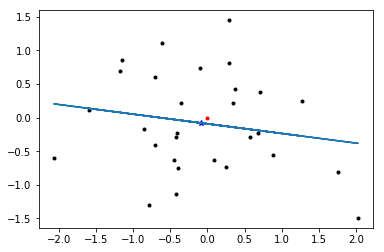

X :r -0.181285681423, r2 -0.181285681423 , p 0.0328644982892


In [9]:
import scipy.stats
def plot_with_outlier(x_out, y_out):
    #plt.plot(np.concatenate([X, np.array([x_out])], axis=0),np.concatenate([Y,np.array([y_out])], axis=0),'.')
    plt.plot(X,Y,'k.')
    plt.plot(x_out,y_out,'r.')
    
    Xs = np.concatenate([X, np.array([x_out])], axis=0)
    Ys = np.concatenate([Y,np.array([y_out])], axis=0)
    
    (r,p) = scipy.stats.pearsonr(Xs, Ys)
    a = r * (np.std(Ys)/np.std(Xs))
    b = np.mean(Ys)-(a*np.mean(Xs))
    
    plt.plot(np.mean(Xs),np.mean(Ys),'b*')    
    plt.plot(Xs,Xs*a+b)
    plt.show()

    print('X :r {0:2}, r2 {0:2} , p {1:3}'.format(r,r**2, p))


interactive_plot = interactive(plot_with_outlier, 
                               x_out=(-4.0, 4.0), y_out=(-4.0,4.0))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot